<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,82.563407,-0.005867,92.557540,92.562231,-0.004692
1,0.0,1.0,66.633756,-0.001085,76.632671,76.633130,-0.000459
2,0.0,2.0,23.709226,-0.005827,33.703399,33.710078,-0.006679
3,0.0,3.0,59.276704,-0.009025,69.267679,69.276331,-0.008652
4,0.0,4.0,67.242454,0.005683,77.248137,77.241806,0.006331
...,...,...,...,...,...,...,...
59995,999.0,55.0,74.651898,-0.003368,84.648530,84.650654,-0.002124
59996,999.0,56.0,78.076437,-0.004277,88.072159,88.075123,-0.002964
59997,999.0,57.0,28.732907,0.021870,38.754778,38.732594,0.022184
59998,999.0,58.0,21.038159,-0.002298,31.035862,31.038002,-0.002140


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,82.563407,-0.005867,92.557540,92.562231,-0.004692
1,0.0,1.0,66.633756,-0.001085,76.632671,76.633130,-0.000459
2,0.0,2.0,23.709226,-0.005827,33.703399,33.710078,-0.006679
3,0.0,3.0,59.276704,-0.009025,69.267679,69.276331,-0.008652
4,0.0,4.0,67.242454,0.005683,77.248137,77.241806,0.006331
...,...,...,...,...,...,...,...
59995,999.0,55.0,74.651898,-0.003368,84.648530,84.650654,-0.002124
59996,999.0,56.0,78.076437,-0.004277,88.072159,88.075123,-0.002964
59997,999.0,57.0,28.732907,0.021870,38.754778,38.732594,0.022184
59998,999.0,58.0,21.038159,-0.002298,31.035862,31.038002,-0.002140


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    82.563407 -0.005867  92.557540  92.562231 -0.004692
      1.0    66.633756 -0.001085  76.632671  76.633130 -0.000459
      2.0    23.709226 -0.005827  33.703399  33.710078 -0.006679
      3.0    59.276704 -0.009025  69.267679  69.276331 -0.008652
      4.0    67.242454  0.005683  77.248137  77.241806  0.006331
...                ...       ...        ...        ...       ...
999.0 55.0   74.651898 -0.003368  84.648530  84.650654 -0.002124
      56.0   78.076437 -0.004277  88.072159  88.075123 -0.002964
      57.0   28.732907  0.021870  38.754778  38.732594  0.022184
      58.0   21.038159 -0.002298  31.035862  31.038002 -0.002140
      59.0   68.184975  0.009783  78.194757  78.183862  0.010895

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    82.563407 -0.005867  92.557540  92.562231 -0.004692
      1.0    66.633756 -0.001085  76.632671  76.633130 -0.000459
      2.0    23.709226 -0.005827  33.703399  33.710078 -0.006679
      3.0    59.276704 -0.009025  69.267679  69.276331 -0.008652
      4.0    67.242454  0.005683  77.248137  77.241806  0.006331
...                ...       ...        ...        ...       ...
999.0 55.0   74.651898 -0.003368  84.648530  84.650654 -0.002124
      56.0   78.076437 -0.004277  88.072159  88.075123 -0.002964
      57.0   28.732907  0.021870  38.754778  38.732594  0.022184
      58.0   21.038159 -0.002298  31.035862  31.038002 -0.002140
      59.0   68.184975  0.009783  78.194757  78.183862  0.010895

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,82.563407,-0.005867,92.557540,92.562231,-0.004692
1,0.0,1.0,66.633756,-0.001085,76.632671,76.633130,-0.000459
2,0.0,2.0,23.709226,-0.005827,33.703399,33.710078,-0.006679
3,0.0,3.0,59.276704,-0.009025,69.267679,69.276331,-0.008652
4,0.0,4.0,67.242454,0.005683,77.248137,77.241806,0.006331
...,...,...,...,...,...,...,...
59995,999.0,55.0,74.651898,-0.003368,84.648530,84.650654,-0.002124
59996,999.0,56.0,78.076437,-0.004277,88.072159,88.075123,-0.002964
59997,999.0,57.0,28.732907,0.021870,38.754778,38.732594,0.022184
59998,999.0,58.0,21.038159,-0.002298,31.035862,31.038002,-0.002140


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    82.563407 -0.005867  92.557540  92.562231 -0.004692
      1.0    66.633756 -0.001085  76.632671  76.633130 -0.000459
      2.0    23.709226 -0.005827  33.703399  33.710078 -0.006679
      3.0    59.276704 -0.009025  69.267679  69.276331 -0.008652
      4.0    67.242454  0.005683  77.248137  77.241806  0.006331
...                ...       ...        ...        ...       ...
999.0 55.0   74.651898 -0.003368  84.648530  84.650654 -0.002124
      56.0   78.076437 -0.004277  88.072159  88.075123 -0.002964
      57.0   28.732907  0.021870  38.754778  38.732594  0.022184
      58.0   21.038159 -0.002298  31.035862  31.038002 -0.002140
      59.0   68.184975  0.009783  78.194757  78.183862  0.010895

[60000 rows x 5 columns]

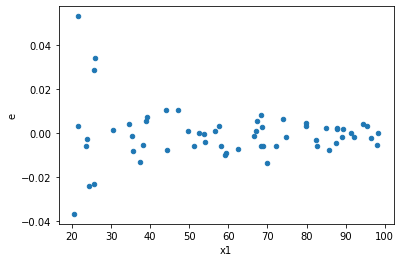

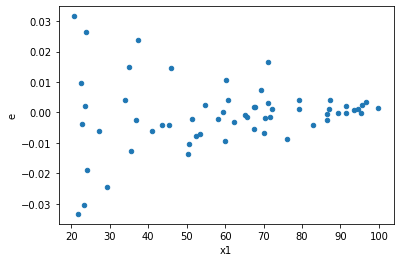

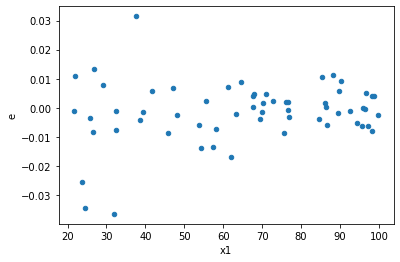

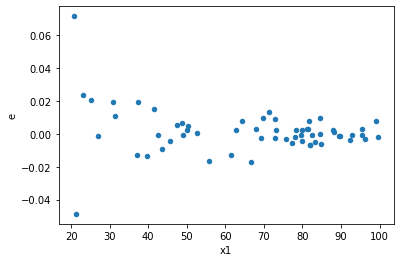

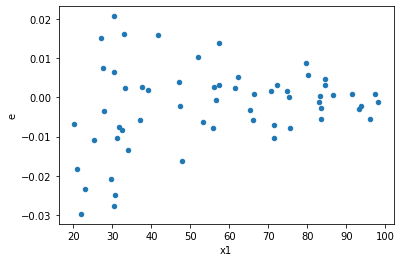

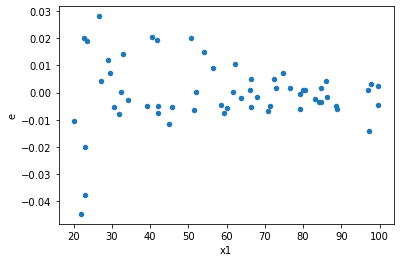

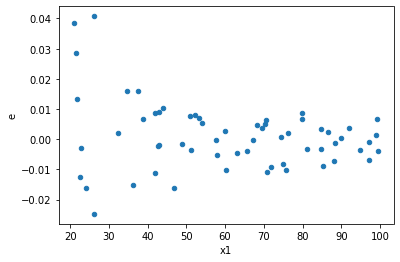

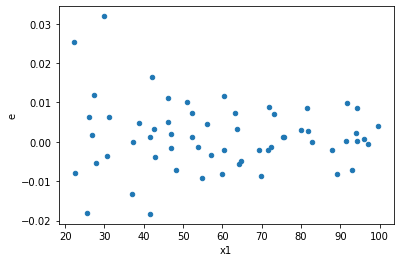

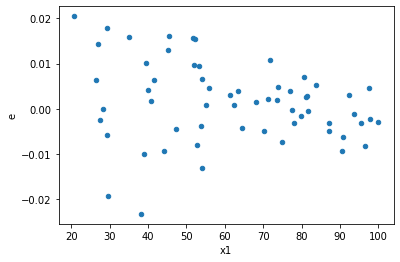

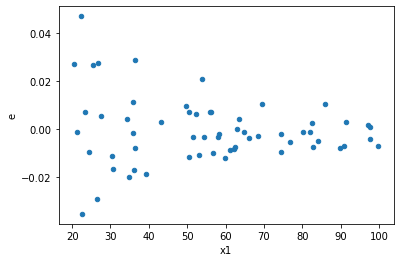

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,0.008018044908884093,0.0004897800563230196,0.00034861064821235186,2.129478505752259e-05,0.06108472350664153,4.30968596035112e-09,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,0.006326888621528333,0.0005325030563184491,0.00027508211397949273,2.3152306796454308e-05,0.08416507515345147,1.092481882807962e-07,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,0.004970410764777614,0.0006460255336552949,0.00021610481585989627,2.8088066680664997e-05,0.12997427460790545,6.778089963453323e-06,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,0.009454906259960637,0.0004568460494279961,0.00041108288086785376,1.98628717142607e-05,0.04831841129537524,3.7528614904157945e-10,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,0.004002928245342665,0.00047958453854604383,0.00017404035849315935,2.085150167591495e-05,0.1198084275190373,3.2115678696459923e-06,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,0.007234807315871042,0.0005013080849407288,0.0003145568398204801,2.1796003693075166e-05,0.06929114529989017,1.5613894424042705e-08,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,0.006083427034829096,0.0007770746477209955,0.00026449682760126505,3.3785854248738935e-05,0.12773633073464258,5.786640885633272e-06,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,0.003303042125618863,0.0006094152732411284,0.00014361052720082012,2.6496316227875146e-05,0.1845012113271027,0.0001419755064142706,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,0.003346868268747991,0.0004889131995916852,0.00014551601168469528,2.1257095634421094e-05,0.1460808016129597,1.9306157125537168e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    983
Reject001=1 : Homoscedasticity       17
Name: Result_test, dtype: int64